<a href="https://colab.research.google.com/github/erichardson97/CloneSearch/blob/main/clonesearch_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# %pip install clonesearch
%pip install biopython
import pandas as pd
import requests
from Bio.Seq import translate
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
%pip install levenshtein
%pip install clone_search_abs
import clonesearch.main as clonesearch
from clonesearch import utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 11.9 MB/s eta 0:00:00
Looking in indexes: https://test.pypi.org/simple/


In [ ]:
#https://developers.zenodo.org/#quickstart-upload

db_record_id = '10258128'
api_url = f'https://zenodo.org/api/records/{db_record_id}'
r = requests.get(api_url).json()
for file in r['files']:
  if file['key'] == 'EBOVAbDab.csv':
    file_url = file['links']['self']
    file_name = file['key']
    file_response = requests.get(file_url)
    with open('EBOVAbDab.csv', 'w') as k:
      k.write(file_response.content.decode())
db = pd.read_csv('EBOVAbDab.csv')
db = db[db["Species"]=='Human']
db.rename(columns={'Name':'sequence_id','IGHV':'v_call','CDRH3':'cdr3_aa'}).to_csv('EBOVAbDab.tsv', sep = '\t')

In [ ]:
example_record = '10631769'
api_url = f'https://zenodo.org/api/records/{example_record}'
r = requests.get(api_url).json()
for file in r['files']:
  if file['key'] == 'example_subject100059.tsv':
    file_url = file['links']['self']
    file_name = file['key']
    file_response = requests.get(file_url)
    with open(file['key'], 'w') as k:
      k.write(file_response.content.decode())

In [ ]:
path = 'example_subject100059.tsv'
airrf = AirrFile(path, use_v = True, use_j = False, use_allele = True)
airrf.file['cdr3_aa'] = airrf.file['cdr3'].map(lambda x:translate(x.replace('.','')))
airrf.file = airrf.file[airrf.file['c_call'].fillna('').str.contains('IGHG')]
airrf.process()
airrf.add_db('EBOVAbDab.tsv', 'EBOV')
airrf.query_db('EBOV', f'Max_EBOV', threshold = 0, use_threshold = False, annot_func= lambda x:max(x.values()) if x != {} else 0)
airrf.query_db('EBOV', f'EBOV_70', threshold = .7, use_threshold = True)

/usr/local/lib/python3.10/dist-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(
<ipython-input-65-7efad17c7ae3>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['cdr3_length'] = dataframe[cdr3_field].fillna('').map(len)
<ipython-input-65-7efad17c7ae3>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['v'] = dataframe[v_f

Text(0, 0.5, 'Proportion hits to EBOV-AbDab (70%, UMI count)')

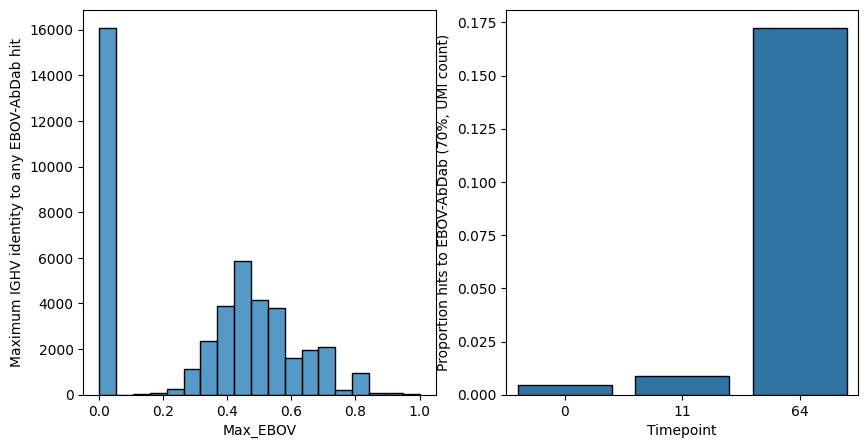

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
bins = np.linspace(0, 1, 20)
sns.histplot(data = airrf.file['Max_EBOV'], ax = ax[0], bins = bins)
proportion_hits = pd.DataFrame(airrf.file.groupby('timepoint').apply(lambda x:x[x['EBOV_70']!='']['conscount'].sum()/x['conscount'].sum())).rename(columns = {0: 'Proportion hits'}).reset_index()
sns.barplot(data = proportion_hits, x = 'timepoint', y = 'Proportion hits', edgecolor='k',linewidth=1)
ax[1].set_xlabel('Timepoint')
ax[0].set_ylabel('Maximum IGHV identity to any EBOV-AbDab hit')
ax[1].set_ylabel('Proportion hits to EBOV-AbDab (70%, UMI count)')

In [ ]:
path = 'example_subject100059.tsv'
airrf = AirrFile(path, use_v = True, use_j = False, use_allele = False)
airrf.file['cdr3_aa'] = airrf.file['cdr3'].map(lambda x:translate(x.replace('.','')))
airrf.file = airrf.file[airrf.file['c_call'].fillna('').str.contains('IGHG')]
airrf.process()
covid_db = download_covabdab('covabdab.tsv', filter_human = True)
airrf.dbs['COVID'] = covid_db
airrf.query_db('COVID', f'Max_COVID', threshold = 0, use_threshold = False, annot_func= lambda x:max(x.values()) if x != {} else 0)
airrf.query_db('COVID', f'COVID_70', threshold = .7, use_threshold = True)

/usr/local/lib/python3.10/dist-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Text(0, 0.5, 'Proportion hits to CoV-AbDab (70%, UMI count)')

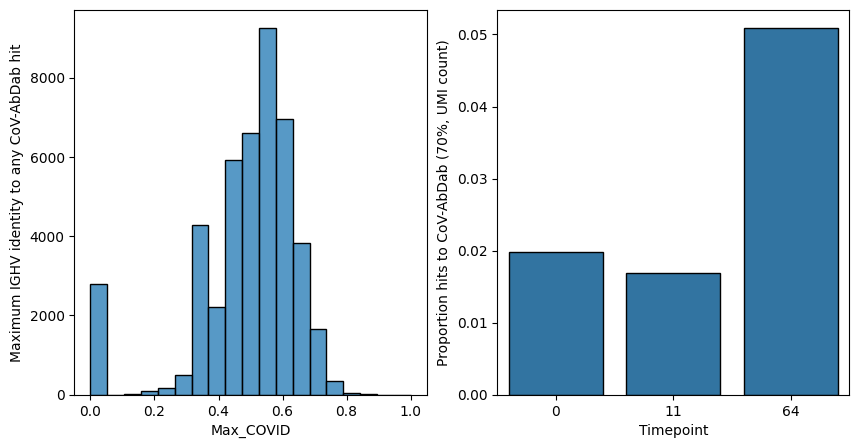

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
bins = np.linspace(0, 1, 20)
sns.histplot(data = airrf.file['Max_COVID'], ax = ax[0], bins = bins)
proportion_hits = pd.DataFrame(airrf.file.groupby('timepoint').apply(lambda x:x[x['COVID_70']!='']['conscount'].sum()/x['conscount'].sum())).rename(columns = {0: 'Proportion hits'}).reset_index()
sns.barplot(data = proportion_hits, x = 'timepoint', y = 'Proportion hits', edgecolor='k',linewidth=1)
ax[1].set_xlabel('Timepoint')
ax[0].set_ylabel('Maximum IGHV identity to any CoV-AbDab hit')
ax[1].set_ylabel('Proportion hits to CoV-AbDab (70%, UMI count)')